**Data Science - Final Project: George Abuya (#073171)**

In [1]:
# Importation of Key Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

print('Completed importing Data !')

Completed importing Data !


In [2]:
sns.set(rc={'figure.figsize':(13, 10)})

In [3]:
# Load Animal Class Dataset

df=pd.read_csv('C:/2019_DS01_FinalProject/Zoo/ClassZoo.csv')
df.head()

,animal_name,Class_Type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,Mammal,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,Mammal,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,Fish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,Mammal,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,Mammal,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#Group by Class Type
Class_groups = df.groupby(df['Class_Type'])
Class_groups.sum()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
Class_Type,,,,,,,,,,,,,,,,,
Amphibian,0,0,4,0,0,4,3,4,4,4,1,0,16,1,0,0,20
Bird,0,20,20,0,16,6,9,0,20,20,0,0,40,20,3,6,40
Bug,4,0,8,0,6,0,1,0,0,8,2,0,48,0,1,0,48
Fish,0,0,13,0,0,13,9,13,13,0,1,13,0,13,1,4,52
Invertebrate,0,0,9,0,0,6,8,0,0,3,2,0,37,1,0,1,70
Mammal,39,0,1,41,2,6,22,40,41,41,0,4,138,35,8,32,41
Reptile,0,0,4,0,0,1,4,4,5,4,2,0,8,5,0,1,15


In [5]:
#Read in data & create total column
stacked_bar_data = pd.read_csv('C:/2019_DS01_FinalProject/Zoo/ClassZoo.csv')
stacked_bar_data["total"] = stacked_bar_data.Class_Type + stacked_bar_data.animal_name


In [6]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})


In [7]:
# Load Animal Type Dataset

df2=pd.read_csv('C:/2019_DS01_FinalProject/Zoo/Zoo.csv')
df2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
pp.ProfileReport(df)

Number of variables,19
Number of observations,101
Total Missing (%),0.0%
Total size in memory,15.1 KiB
Average record size in memory,152.8 B
Numeric,2
Categorical,1
Boolean,15
Date,0
Text (Unique),1
Rejected,0


In [9]:
# list the data types for each column
df.dtypes

animal_name    object
Class_Type     object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [10]:
pd.pandas.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(13,10)})

In [11]:
# list the Info and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
animal_name    101 non-null object
Class_Type     101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(2)
memory usage: 15.1+ KB


In [12]:
df.isnull().sum()

animal_name    0
Class_Type     0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [13]:
# Check duplicated values again
df.duplicated().sum()

0

In [14]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

In [15]:
df.columns

Index(['animal_name', 'Class_Type', 'hair', 'feathers', 'eggs', 'milk',
       'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
       'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize',
       'class_type'],
      dtype='object')

In [16]:
df.groupby('Class_Type')

In [17]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
# Group the dataframe by Class Type and Animal Name

df.groupby(['Class_Type', 'animal_name'])

In [19]:
# Group the dataframe by Class Type and Animal Name
df.groupby(['Class_Type', 'animal_name']).sum()

hair  feathers  eggs  milk  airborne  aquatic  \
Class_Type animal_name                                                    
Amphibian  frog              0         0     1     0         0        1   
           frog_venomous     0         0     1     0         0        1   
           newt              0         0     1     0         0        1   
           toad              0         0     1     0         0        1   
Bird       chicken           0         1     1     0         1        0   
           crow              0         1     1     0         1        0   
           dove              0         1     1     0         1        0   
           duck              0         1     1     0         1        1   
           flamingo          0         1     1     0         1        0   
           gull              0         1     1     0         1        1   
           hawk              0         1     1     0         1        0   
           kiwi              0         1     1     0         0        0   
           lark              0         1     1     0         1        0   
           ostrich           0         1     1     0         0        0   
           parakeet          0         1     1     0         1        0   
           penguin           0         1     1     0         0        1   
           pheasant          0         1     1     0         1        0   
           rhea              0         1     1     0         0        0   
           skimmer           0         1     1     0         1        1   
           skua              0         1     1     0         1        1   
           sparrow           0         1     1     0         1        0   
           swan              0         1     1     0         1        1   
           vulture           0         1     1     0         1        0   
           wren              0         1     1     0         1        0   
Bug        flea              0         0     1     0         0        0   
           gnat              0         0     1     0         1        0   
           honeybee          1         0     1     0         1        0   
           housefly          1         0     1     0         1        0   
           ladybird          0         0     1     0         1        0   
           moth              1         0     1     0         1        0   
...                        ...       ...   ...   ...       ...      ...   
Mammal     hamster           1         0     0     1         0        0   
           hare              1         0     0     1         0        0   
           leopard           1         0     0     1         0        0   
           lion              1         0     0     1         0        0   
           lynx              1         0     0     1         0        0   
           mink              1         0     0     1         0        1   
           mole              1         0     0     1         0        0   
           mongoose          1         0     0     1         0        0   
           opossum           1         0     0     1         0        0   
           oryx              1         0     0     1         0        0   
           platypus          1         0     1     1         0        1   
           polecat           1         0     0     1         0        0   
           pony              1         0     0     1         0        0   
           porpoise          0         0     0     1         0        1   
           puma              1         0     0     1         0        0   
           pussycat          1         0     0     1         0        0   
           raccoon           1         0     0     1         0        0   
           reindeer          1         0     0     1         0        0   
           seal              1         0     0     1         0        1   
           sealion           1         0     0     1         0        1   
           squirrel          1         0     0     

In [20]:
Class_animal_counts = df['Class_Type'].value_counts().to_frame()

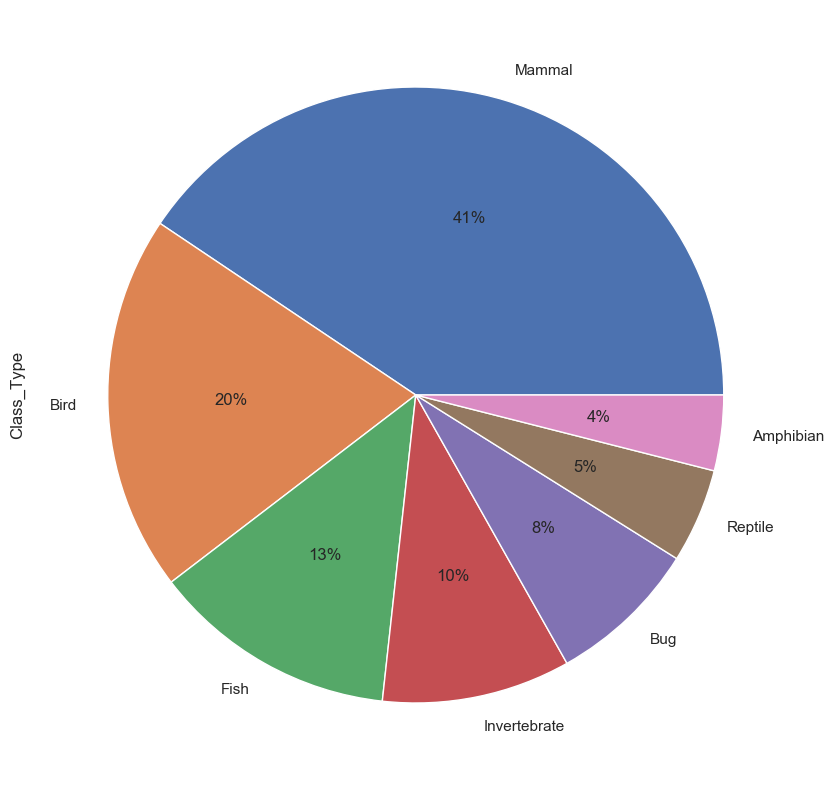

In [21]:
df['Class_Type'].value_counts().plot(kind='pie', autopct = '%1.0f%%')


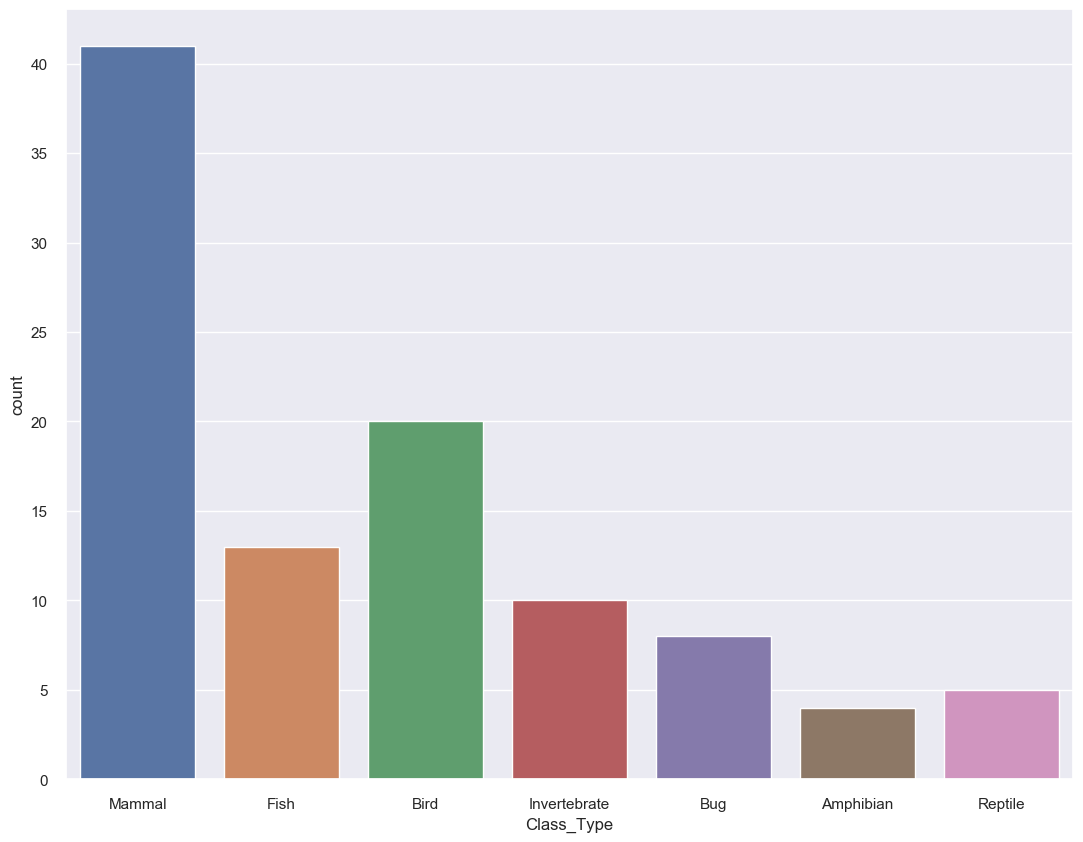

In [22]:
sns.countplot(df['Class_Type'])

In [23]:
#df_mammals=df['Class_Type'].groupby(['animal_name'])
df_mammals=df[df['Class_Type']=='Mammal'].sum()
df_mammals
#df['aninal_name' groupby('Class_Type')].value_counts().plot(kind='bar')

animal_name    aardvarkantelopebearboarbuffalocalfcavycheetah...
Class_Type     MammalMammalMammalMammalMammalMammalMammalMamm...
hair                                                          39
feathers                                                       0
eggs                                                           1
milk                                                          41
airborne                                                       2
aquatic                                                        6
predator                                                      22
toothed                                                       40
backbone                                                      41
breathes                                                      41
venomous                                                       0
fins                                                           4
legs                                                         138
tail                     

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
df.columns

Index(['animal_name', 'Class_Type', 'hair', 'feathers', 'eggs', 'milk',
       'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
       'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize',
       'class_type'],
      dtype='object')

In [28]:
x = df[['hair', 'feathers', 'eggs', 'milk',
       'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
       'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize'
       ]]

y = df['Class_Type']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
Model1= DecisionTreeClassifier()
Model2= RandomForestClassifier(n_estimators=100)

In [31]:
Model1.fit(x_train, y_train)
Model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# Generate Accuracy Report for Decision Tree

y_pred1 = Model1.predict(x_test)
acct1 = accuracy_score(y_test, y_pred1)
acct1

0.95238095238095233

In [33]:
# Decision Tree Report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

   Amphibian       0.75      1.00      0.86         3
        Bird       1.00      1.00      1.00         3
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         1
      Mammal       1.00      1.00      1.00         7
     Reptile       1.00      0.67      0.80         3

   micro avg       0.95      0.95      0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



In [34]:
# Generate Accuracy Report for Random Forest

y_pred2 = Model2.predict(x_test)
acct2 = accuracy_score(y_test, y_pred2)
acct2

0.90476190476190477

In [35]:
# Random Forest Report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

   Amphibian       0.75      1.00      0.86         3
        Bird       1.00      1.00      1.00         3
         Bug       1.00      1.00      1.00         2
        Fish       0.67      1.00      0.80         2
Invertebrate       1.00      1.00      1.00         1
      Mammal       1.00      1.00      1.00         7
     Reptile       1.00      0.33      0.50         3

   micro avg       0.90      0.90      0.90        21
   macro avg       0.92      0.90      0.88        21
weighted avg       0.93      0.90      0.89        21



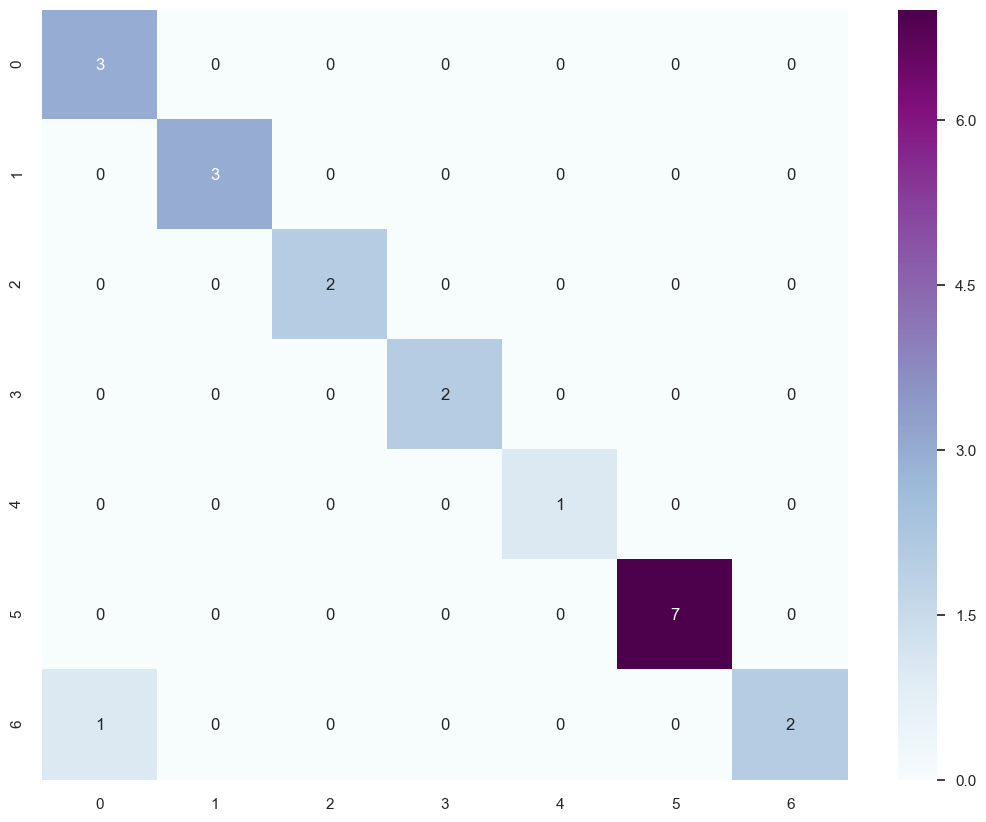

In [36]:
#Confusion Report for the Decision Tree

dt_cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='BuPu')